<a href="https://colab.research.google.com/github/Savaliyaniks1/Project_5/blob/main/Experience_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** 3 - Experience Analysis ***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## for showing all columns

pd.set_option("display.max_row",None)
pd.set_option("display.max_column",None)

In [ ]:
data = pd.read_csv(r"/content/Engagement_Analysis.csv")

In [ ]:
data.head()

MSISDN/Number                       Handset Type  Total DL (Bytes)  \
0   3.366447e+10                    Huawei B593S-22       535118044.0   
1   3.365875e+10                       Huawei E5180       422406937.0   
2   3.366274e+10           Samsung Galaxy A8 (2018)        93360974.0   
3   3.366917e+10  Samsung Galaxy S9 Plus (Sm-G965F)       193656366.0   
4   3.366555e+10                   Huawei B528S-23A       519351173.0   

   Total UL (Bytes) Handset Manufacturer Application  Sessions_Frequency  \
0        33691738.0               Huawei       Email        1.311448e+19   
1        26026033.0               Huawei       Email        1.304243e+19   
2        50576233.0              Samsung      Others        1.304243e+19   
3        32643783.0              Samsung     Netflix        1.304243e+19   
4        33314765.0               Huawei      Gaming        1.304243e+19   

   Dur. (ms)  session_total_traffic  engagement_score  
0   104687.0            568809782.0      7.809280e+23  
1   104687.0            448432970.0      6.122780e+23  
2   104687.0            143937207.0      1.965279e+23  
3   104687.0            226300149.0      3.089840e+23  
4   104687.0            552665938.0      7.545948e+23

In [ ]:
clean_data = pd.read_excel(r"/content/telcom_data.xlsx")

In [ ]:
clean_data.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   9164566995485190             42.0              5.0   
1            L77566A             65.0              5.0   
2            D42335A              NaN              NaN   
3            T21824A              NaN              NaN   
4            D88865A              NaN              NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                   0.0              NaN              NaN   
1                   0.0              NaN              NaN   
2                   0.0              NaN              NaN   
3                   0.0              NaN              NaN   
4                   0.0              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
0                    37624.0                    38787.0  1.823653e+09   
1                      168.0                     3560.0  1.365104e+09   
2                        0.0                        0.0  1.361763e+09   
3                     3330.0                    37882.0  1.321510e+09   
4                        0.0                        0.0  1.089009e+09   

  Handset Manufacturer                 Handset Type  \
0      

In [ ]:
# Concatenate the DataFrames
combined_data = pd.concat([clean_data,data], axis=1)


In [ ]:
combined_data.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   9164566995485190             42.0              5.0   
1            L77566A             65.0              5.0   
2            D42335A              NaN              NaN   
3            T21824A              NaN              NaN   
4            D88865A              NaN              NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                   0.0              NaN              NaN   
1                   0.0              NaN              NaN   
2                   0.0              NaN              NaN   
3                   0.0              NaN              NaN   
4                   0.0              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
0                    37624.0                    38787.0  1.823653e+09   
1                      168.0                     3560.0  1.365104e+09   
2                        0.0                        0.0  1.361763e+09   
3                     3330.0                    37882.0  1.321510e+09   
4                        0.0                        0.0  1.089009e+09   

  Handset Manufacturer                 Handset Type  \
0      

In [ ]:
New_data = combined_data[['MSISDN/Number','Avg RTT DL (ms)',	'Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','Handset Type',	'Total DL (Bytes)',	'Total UL (Bytes)',	'Handset Manufacturer',	'Application',	'Sessions_Frequency',	'Dur. (ms)',	'session_total_traffic',	'engagement_score']]

In [ ]:
New_data.head()

MSISDN/Number  MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   3.366496e+10   3.366447e+10             42.0              5.0   
1   3.368185e+10   3.365875e+10             65.0              5.0   
2   3.376063e+10   3.366274e+10              NaN              NaN   
3   3.375034e+10   3.366917e+10              NaN              NaN   
4   3.369980e+10   3.366555e+10              NaN              NaN   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

                  Handset Type                       Handset Type  \
0   Samsung Galaxy A5 Sm-A520F                    Huawei B593S-22   
1  Samsung Galaxy J5 (Sm-J530)                       Huawei E5180   
2     Samsung Galaxy A8 (2018)           Samsung Galaxy A8 (2018)   
3                    undefined  Samsung Galaxy S9 Plus (Sm-G965F)   
4             Samsung Sm-G390F                   Huawei B528S-23A   

   Total DL (Bytes)  Total DL (Bytes)  Total UL (Bytes)  Total UL (Bytes)  \
0       308879636.0       535118044.0        36749741.0        33691738.0   
1       653384965.0       422406937.0        53800391.0        26026033.0   
2       279807335.0        93360974.0        27883638.0        50576233.0   
3       846028530.0       193656366.0        43324218.0        32643783.0   
4       569138589.0       519351173.0        38542814.0        33314765.0   

  Handset Manufacturer Handset Manufacturer Application  Sessions_Frequency  \
0              Samsung               Huawei       Email        1.311448e+19   
1              Samsung               Huawei       Email        1.304243e+19   
2              Samsung              Samsung      Others        1.304243e+19   
3            undefined              Samsung     Netflix        1.304243e+19   
4              Samsung               Huawei      Gaming        1.304243e+19   

   Dur. (ms)  Dur. (ms)  session_total_traffic  engagement_score  
0  1823652.0   104687.0            568809782.0      7.809280e+23  
1  1365104.0   104687.0            448432970.0      6.122780e+23  
2  1361762.0   104687.0            143937207.0      1.965279e+23  
3  1321509.0   104687.0            226300149.0      3.089840e+23  
4  1089009.0   104687.0            552665938.0      7.545948e+23

In [ ]:


# Check for duplicate columns
duplicate_columns = New_data.columns[New_data.columns.duplicated()]

# If there are duplicate columns, drop them
if len(duplicate_columns) > 0:
    New_data = New_data.loc[:, ~New_data.columns.duplicated()]


In [ ]:
# Get information about data types.

New_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                148935 non-null  float64
 1   Avg RTT DL (ms)              122172 non-null  float64
 2   Avg RTT UL (ms)              122189 non-null  float64
 3   TCP DL Retrans. Vol (Bytes)  61855 non-null   float64
 4   TCP UL Retrans. Vol (Bytes)  53352 non-null   float64
 5   Avg Bearer TP DL (kbps)      150000 non-null  float64
 6   Avg Bearer TP UL (kbps)      150000 non-null  float64
 7   Handset Type                 149429 non-null  object 
 8   Total DL (Bytes)             150000 non-null  float64
 9   Total UL (Bytes)             150000 non-null  float64
 10  Handset Manufacturer         149429 non-null  object 
 11  Application                  17558 non-null   object 
 12  Sessions_Frequency           17558 non-null   float64
 13 

In [ ]:
# Handling missing value

New_data.isnull().sum()/len(New_data)*100

MSISDN/Number                   0.710662
Avg RTT DL (ms)                18.552543
Avg RTT UL (ms)                18.541210
TCP DL Retrans. Vol (Bytes)    58.763608
TCP UL Retrans. Vol (Bytes)    64.432237
Avg Bearer TP DL (kbps)         0.000667
Avg Bearer TP UL (kbps)         0.000667
Handset Type                    0.381331
Total DL (Bytes)                0.000667
Total UL (Bytes)                0.000667
Handset Manufacturer            0.381331
Application                    88.294745
Sessions_Frequency             88.294745
Dur. (ms)                       0.000667
session_total_traffic          88.294745
engagement_score               88.294745
dtype: float64

In [ ]:
# Calculate the mean for numeric columns only
column_means = New_data.select_dtypes(include=['number']).mean()

# Now fill missing values with the mean of each numeric column
New_data.fillna(column_means, inplace=True)

In [ ]:
New_data.isnull().sum()

MSISDN/Number                       0
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
TCP DL Retrans. Vol (Bytes)         0
TCP UL Retrans. Vol (Bytes)         0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
Handset Type                      572
Total DL (Bytes)                    0
Total UL (Bytes)                    0
Handset Manufacturer              572
Application                    132443
Sessions_Frequency                  0
Dur. (ms)                           0
session_total_traffic               0
engagement_score                    0
dtype: int64

In [ ]:
# Fill missing values in categorical columns with the most frequent value
for column in New_data.select_dtypes(include=['object']).columns:
  most_frequent_value = New_data[column].mode()[0]
  New_data[column].fillna(most_frequent_value, inplace=True)

# Check if there are any missing values left
print(New_data.isnull().sum())


MSISDN/Number                  0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
Handset Type                   0
Total DL (Bytes)               0
Total UL (Bytes)               0
Handset Manufacturer           0
Application                    0
Sessions_Frequency             0
Dur. (ms)                      0
session_total_traffic          0
engagement_score               0
dtype: int64


In [ ]:
New_data.describe()

MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05    150001.000000    150001.000000   
mean    4.188282e+10       109.795706        17.662883   
std     2.438731e+12       559.342620        76.529933   
min     3.360100e+10         0.000000         0.000000   
25%     3.365151e+10        35.000000         3.000000   
50%     3.366380e+10        54.000000         7.000000   
75%     3.368473e+10       109.795706        17.662883   
max     8.823971e+14     96923.000000      7120.000000   

       TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
count                 1.500010e+05                 1.500010e+05   
mean                  2.080991e+07                 7.596587e+05   
std                   1.172356e+08                 1.577616e+07   
min                   2.000000e+00                 1.000000e+00   
25%                   1.332932e+06                 6.300900e+04   
50%                   2.080991e+07                 7.596587e+05   
75%                   2.080991e+07                 7.596587e+05   
max                   4.294426e+09                 2.908226e+09   

       Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  Total DL (Bytes)  \
count            150001.000000            150001.000000      1.500010e+05   
mean              13300.045927              1770.428647      4.546434e+08   
std               23971.798635              4625.340082      2.441421e+08   
min                   0.000000                 0.000000      7.114041e+06   
25%                  43.000000                47.000000      2.431072e+08   
50%                  63.000000                63.000000      4.558409e+08   
75%               19710.000000              1120.000000      6.657051e+08   
max              378160.000000             58613.000000      9.029696e+08   

       Total UL (Bytes)  Sessions_Frequency     Dur. (ms)  \
count      1.500010e+05        1.500010e+05  1.500010e+05   
mean       4.112121e+07        1.063615e+19  1.046086e+05   
std        1.127635e+07        9.742679e+17  8.103735e+04   
min        2.866892e+06        6.917538e+18  7.142000e+03   
25%        3.322203e+07        1.063615e+19  5.744200e+04   
50%        4.114324e+07        1.063615e+19  8.639900e+04   
75%        4.903424e+07        1.063615e+19  1.324300e+05   
max        7.833131e+07        1.318654e+19  1.859336e+06   

       session_total_traffic  engagement_score  
count           1.500010e+05      1.500010e+05  
mean            4.957877e+08      4.250919e+23  
std             8.409990e+07      9.010135e+22  
min             3.109335e+07      1.547391e+22  
25%             4.957877e+08      4.250919e+23  
50%             4.957877e+08      4.250919e+23  
75%             4.957877e+08      4.250919e+23  
max             9.526413e+08      1.283712e+24

### Remove outlier from data.

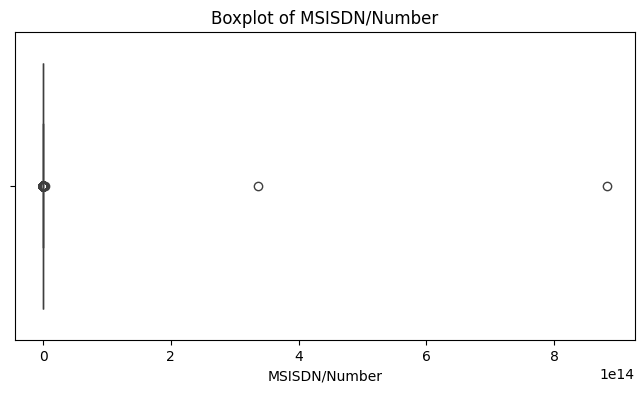

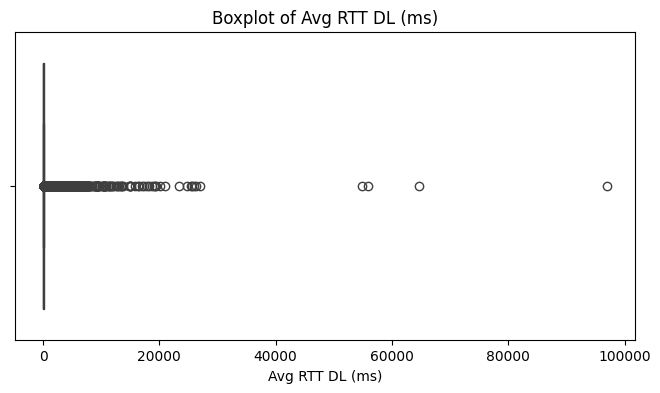

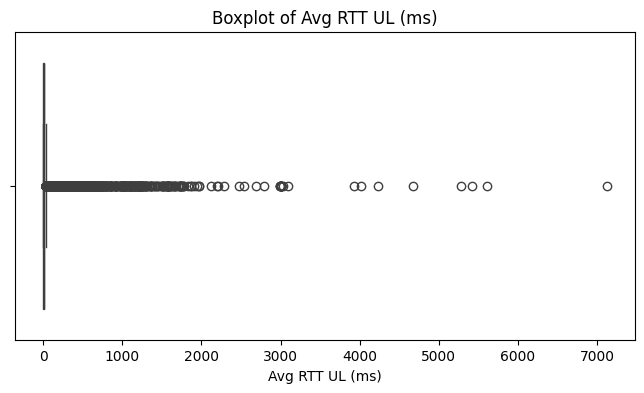

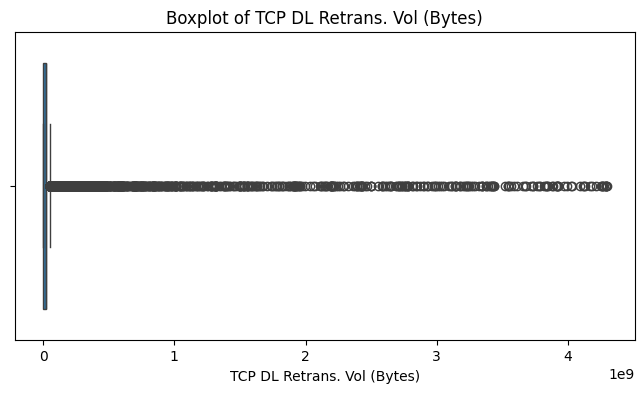

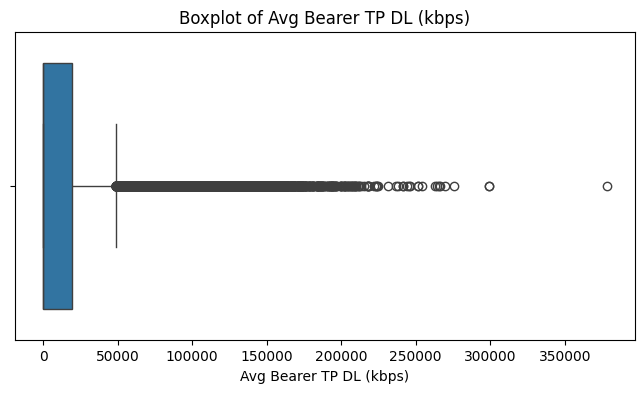

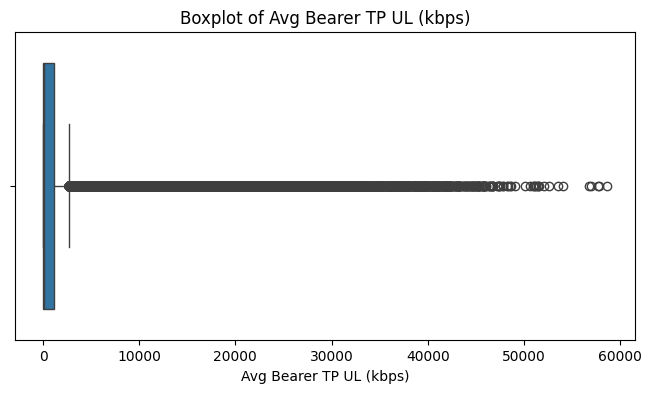

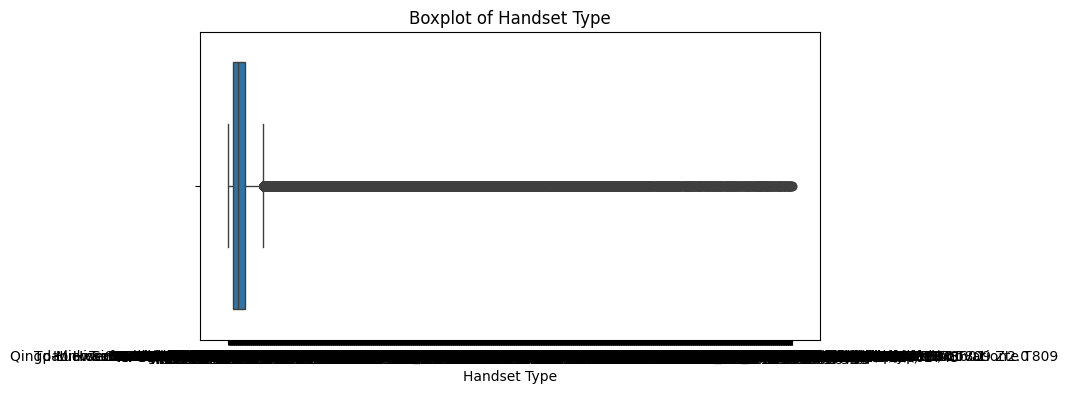

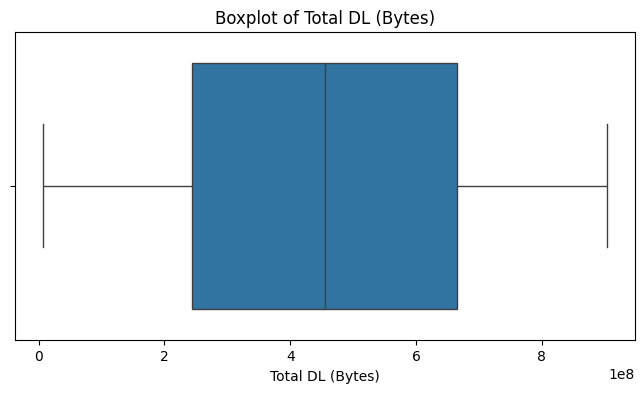

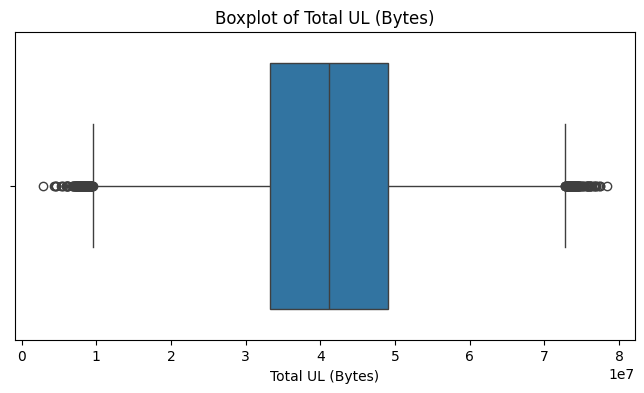

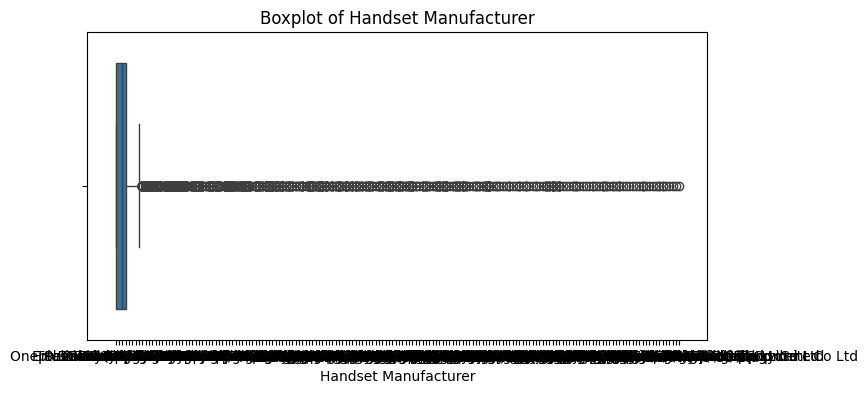

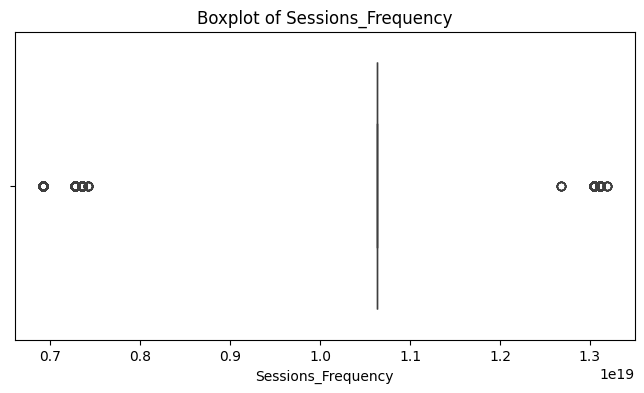

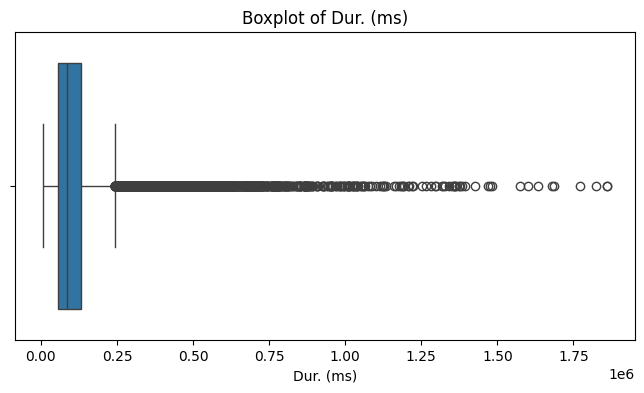

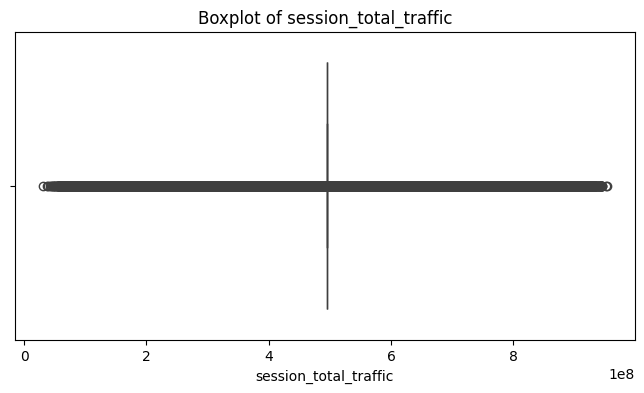

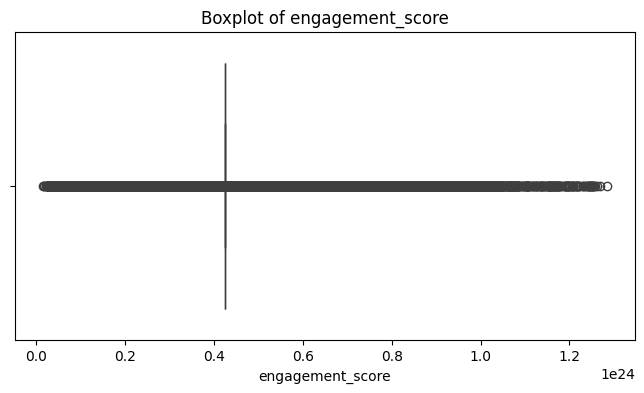

In [ ]:
for column in New_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=New_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
def remove_outliers(col):
  sorted(col)
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  l1 = q1-(1.5*iqr)
  u1 = q3+(1.5*iqr)
  return l1,u1

In [ ]:
New_data.columns

Index(['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Handset Type',
       'Total DL (Bytes)', 'Total UL (Bytes)', 'Handset Manufacturer',
       'Application', 'Sessions_Frequency', 'Dur. (ms)',
       'session_total_traffic', 'engagement_score'],
      dtype='object')

In [ ]:

for i in New_data[
   [
       'Avg RTT DL (ms)',
       'Avg RTT UL (ms)',
       'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)',
       'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)',
       'Total UL (Bytes)',
       'Sessions_Frequency',
       'Dur. (ms)',
       'session_total_traffic',
       'engagement_score']
   ]
]:

  if New_data[i].dtype != 'object':
    l1,u1 = remove_outliers(New_data[i])
    New_data[i] = np.where(New_data[i] > u1, u1, New_data[i])
    New_data[i] = np.where(New_data[i] < l1, l1, New_data[i])


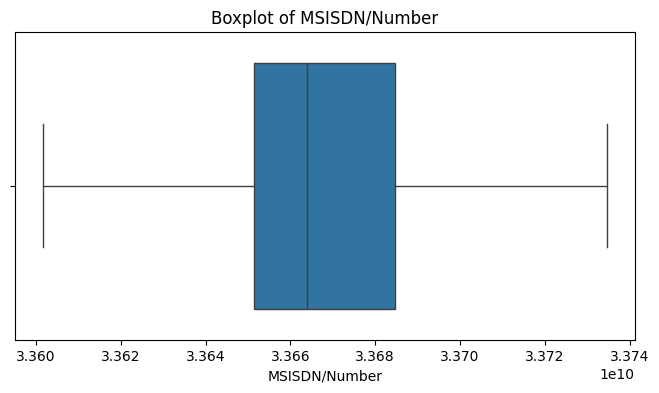

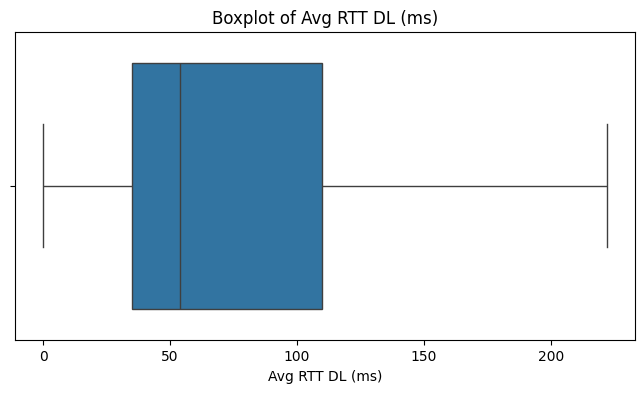

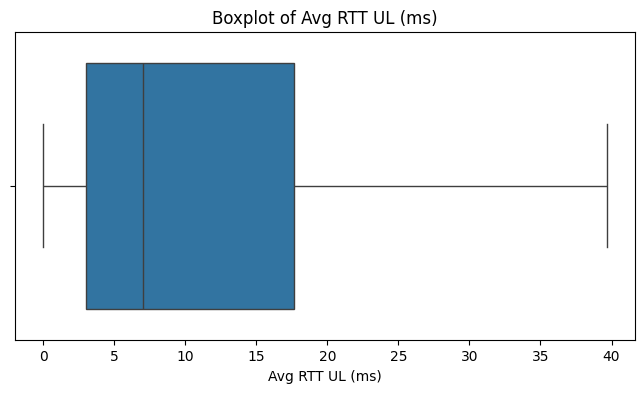

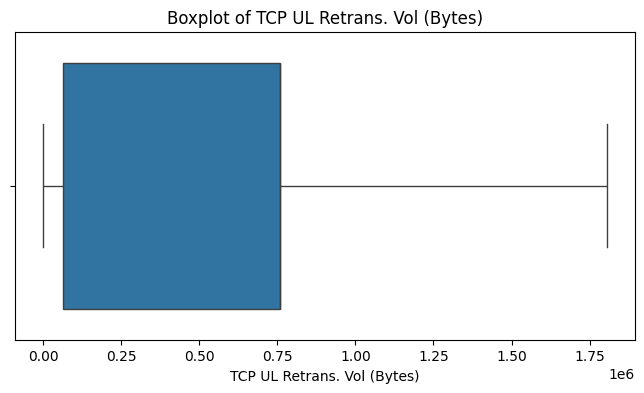

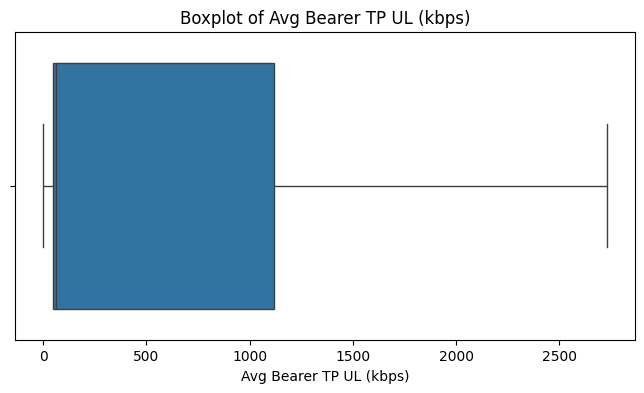

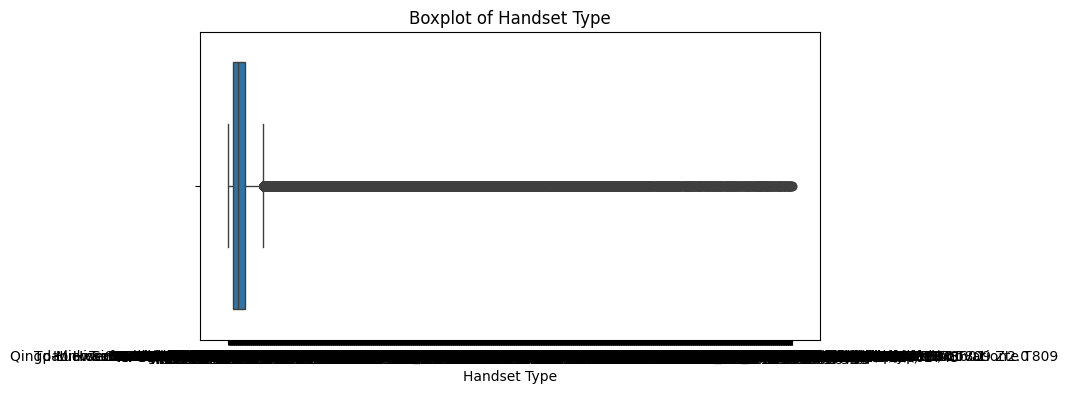

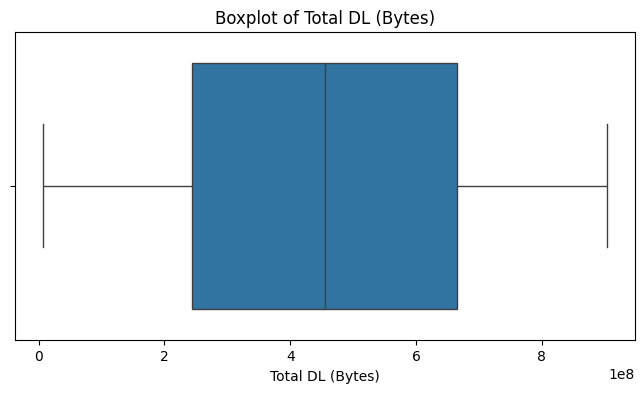

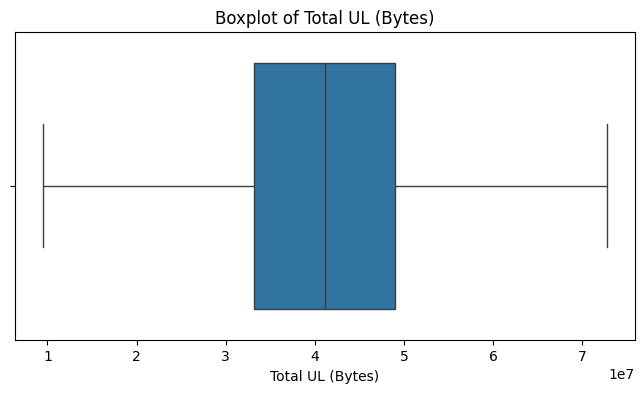

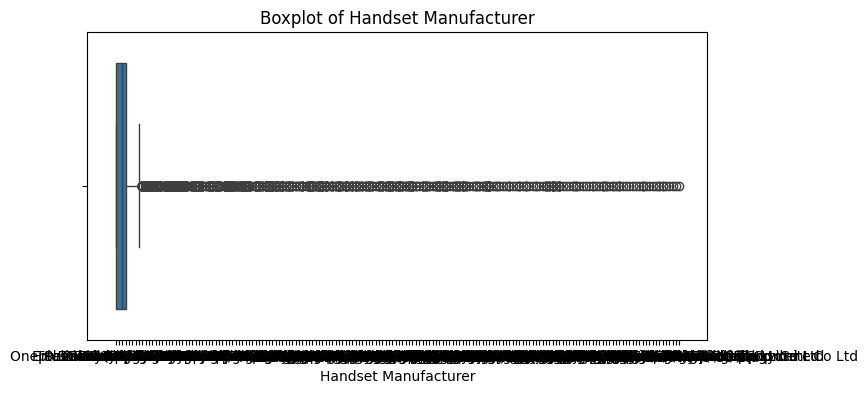

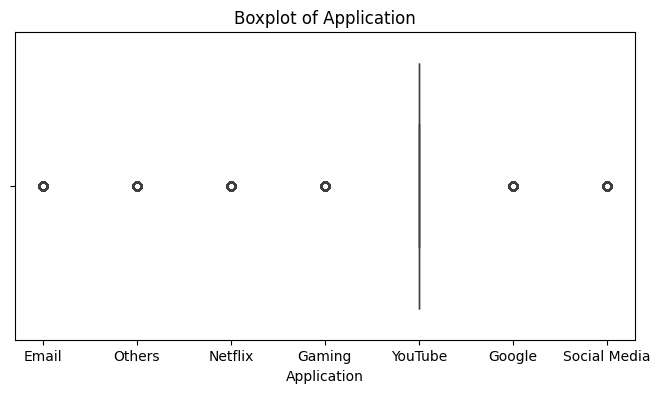

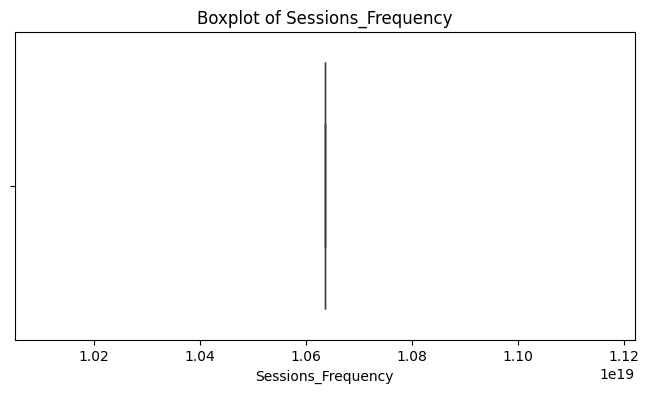

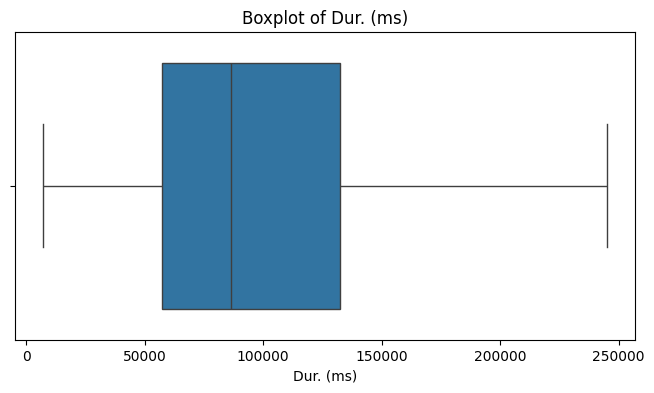

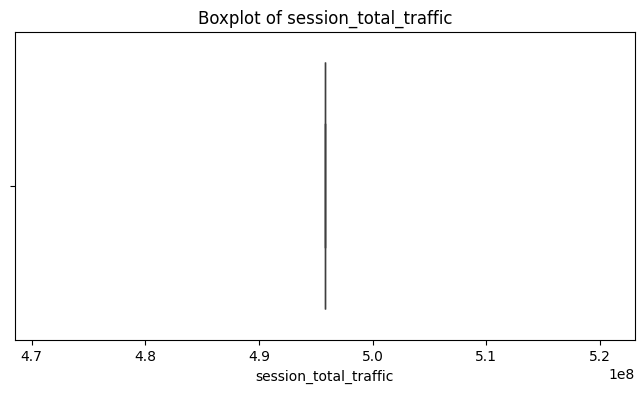

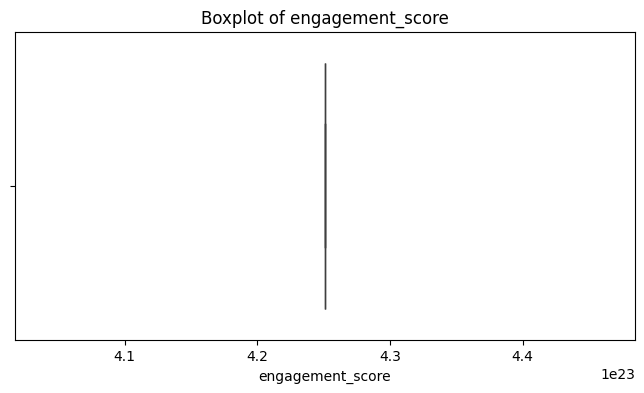

In [ ]:
# Identify and visualize outliers for each column after removing.

for column in New_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=New_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
New_data['RTT'] = New_data['Avg RTT DL (ms)'] + New_data['Avg RTT UL (ms)']
New_data['Throughput'] = New_data['Avg Bearer TP DL (kbps)'] + New_data['Avg Bearer TP UL (kbps)']
New_data['TCP Retransmission'] = New_data['TCP DL Retrans. Vol (Bytes)'] + New_data['TCP UL Retrans. Vol (Bytes)']

In [ ]:
New_data.head()

MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   3.366496e+10        42.000000         5.000000   
1   3.368185e+10        65.000000         5.000000   
2   3.373456e+10       109.795706        17.662883   
3   3.373456e+10       109.795706        17.662883   
4   3.369980e+10       109.795706        17.662883   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                 2.080991e+07                759658.664811   
1                 2.080991e+07                759658.664811   
2                 2.080991e+07                759658.664811   
3                 2.080991e+07                759658.664811   
4                 2.080991e+07                759658.664811   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

                  Handset Type  Total DL (Bytes)  Total UL (Bytes)  \
0   Samsung Galaxy A5 Sm-A520F       308879636.0        36749741.0   
1  Samsung Galaxy J5 (Sm-J530)       653384965.0        53800391.0   
2     Samsung Galaxy A8 (2018)       279807335.0        27883638.0   
3                    undefined       846028530.0        43324218.0   
4             Samsung Sm-G390F       569138589.0        38542814.0   

  Handset Manufacturer Application  Sessions_Frequency  Dur. (ms)  \
0              Samsung       Email        1.063615e+19   244912.0   
1              Samsung       Email        1.063615e+19   244912.0   
2              Samsung      Others        1.063615e+19   244912.0   
3            undefined     Netflix        1.063615e+19   244912.0   
4              Samsung      Gaming        1.063615e+19   244912.0   

   session_total_traffic  engagement_score         RTT  Throughput  \
0           4.957877e+08      4.250919e+23   47.000000        67.0   
1           4.957877e+08      4.250919e+23   70.000000        42.0   
2           4.957877e+08      4.250919e+23  127.458589        15.0   
3           4.957877e+08      4.250919e+23  127.458589        88.0   
4           4.957877e+08      4.250919e+23  127.458589        15.0   

   TCP Retransmission  
0        2.156957e+07  
1        2.156957e+07  
2        2.156957e+07  
3        2.156957e+07  
4        2.156957e+07

In [ ]:
New_data = New_data.rename(columns={'MSISDN/Number': 'Customer ID'})

#  Aggregate features per customer

In [ ]:
# Aggregate data per customer
aggregated_data = New_data.groupby('Customer ID').agg({
    'TCP Retransmission': 'mean',
    'RTT': 'mean',
    'Handset Type': lambda x: x.mode()[0],
    'Throughput': 'mean'
})

# Display the aggregated data
print(aggregated_data.head(10))

              TCP Retransmission         RTT  \
Customer ID                                    
3.360168e+10        1.584457e+07   75.636695   
3.360171e+10        2.156957e+07  115.000000   
3.360171e+10        6.192340e+05  152.000000   
3.360171e+10        1.842327e+07  123.229294   
3.360171e+10        2.156957e+07   34.000000   
3.360172e+10        2.156957e+07  127.458589   
3.360172e+10        2.156957e+07   54.000000   
3.360172e+10        1.121913e+07   54.328604   
3.360172e+10        2.156957e+07   40.000000   
3.360172e+10        1.149620e+07  121.500000   

                                   Handset Type    Throughput  
Customer ID                                                    
3.360168e+10             Apple iPhone 7 (A1778)   9796.009749  
3.360171e+10            Apple iPhone Se (A1723)     70.000000  
3.360171e+10             Apple iPhone 6 (A1586)   9792.000000  
3.360171e+10  Samsung Galaxy S8 Plus (Sm-G955F)  25303.250000  
3.360171e+10        Apple iPhone 7 Plus

# Compute & list 10 of the top, bottom, and most frequent

In [ ]:
# a. TCP values

print("Top 10 TCP values:")
print(aggregated_data['TCP Retransmission'].nlargest(10))
print("\nBottom 10 TCP values:")
print(aggregated_data['TCP Retransmission'].nsmallest(10))
print("\n10 most frequent TCP values:")
print(aggregated_data['TCP Retransmission'].value_counts().head(10))

# b. RTT values

print("\nTop 10 RTT values:")
print(aggregated_data['RTT'].nlargest(10))
print("\nBottom 10 RTT values:")
print(aggregated_data['RTT'].nsmallest(10))
print("\n10 most frequent RTT values:")
print(aggregated_data['RTT'].value_counts().head(10))

# c. Throughput values

print("\nTop 10 Throughput values:")
print(aggregated_data['Throughput'].nlargest(10))
print("\nBottom 10 Throughput values:")
print(aggregated_data['Throughput'].nsmallest(10))
print("\n10 most frequent Throughput values:")
print(aggregated_data['Throughput'].value_counts().head(10))


Top 10 TCP values:
Customer ID
3.361511e+10    5.183002e+07
3.363184e+10    5.183002e+07
3.364070e+10    5.183002e+07
3.364546e+10    5.183002e+07
3.364876e+10    5.183002e+07
3.365005e+10    5.183002e+07
3.365011e+10    5.183002e+07
3.365012e+10    5.183002e+07
3.365117e+10    5.183002e+07
3.365203e+10    5.183002e+07
Name: TCP Retransmission, dtype: float64

Bottom 10 TCP values:
Customer ID
3.365013e+10     97.0
3.361478e+10    128.0
3.362636e+10    134.0
3.360783e+10    143.0
3.365068e+10    176.0
3.367937e+10    179.0
3.369969e+10    182.0
3.369904e+10    189.0
3.367640e+10    208.0
3.361354e+10    211.0
Name: TCP Retransmission, dtype: float64

10 most frequent TCP values:
TCP Retransmission
2.156957e+07    47144
2.081121e+07      301
2.081124e+07      147
7.609887e+05      123
5.183002e+07      120
7.623187e+05       68
7.597507e+05       67
2.081123e+07       65
2.119039e+07       65
7.596967e+05       61
Name: count, dtype: int64

Top 10 RTT values:
Customer ID
3.360593e+10   

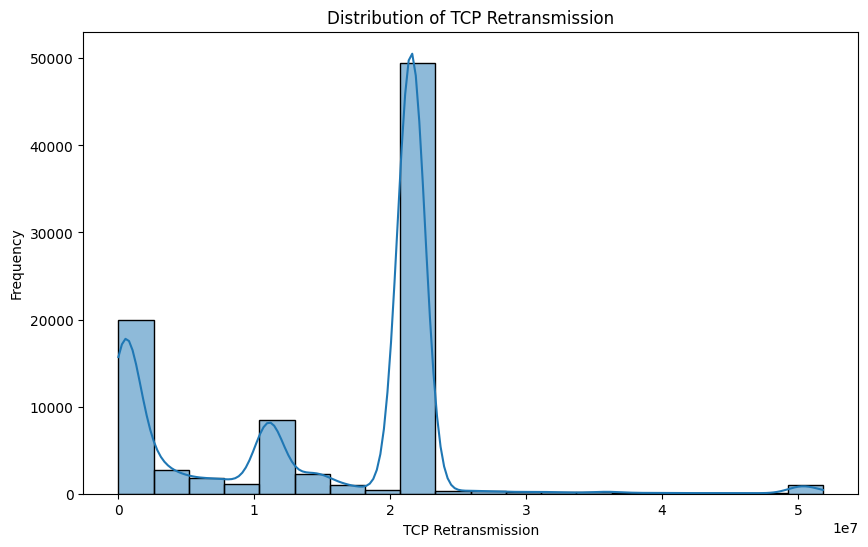

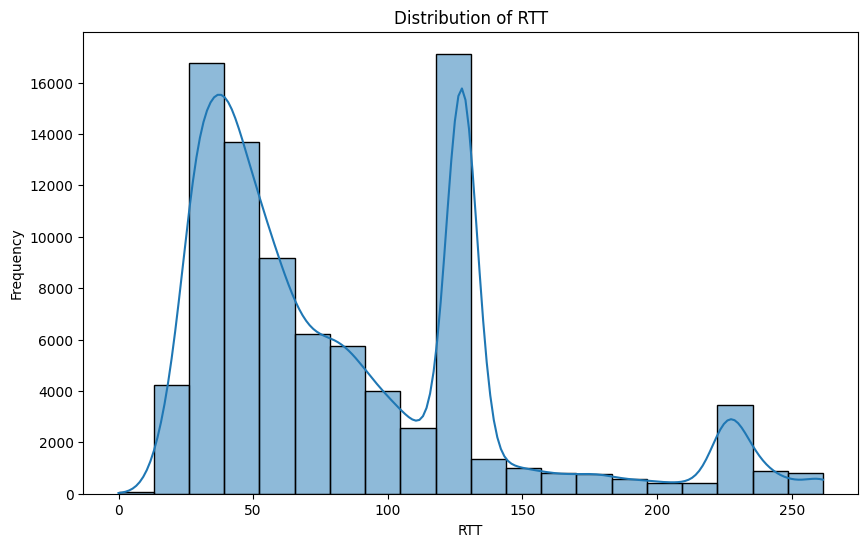

In [ ]:
# a. Distribution of TCP values

plt.figure(figsize=(10, 6))
sns.histplot(aggregated_data['TCP Retransmission'], bins=20, kde=True)
plt.title('Distribution of TCP Retransmission')
plt.xlabel('TCP Retransmission')
plt.ylabel('Frequency')
plt.show()

# b. Distribution of RTT values

plt.figure(figsize=(10,6))
sns.histplot(aggregated_data['RTT'], bins=20, kde=True)
plt.title('Distribution of RTT')
plt.xlabel('RTT')
plt.ylabel('Frequency')
plt.show()

# c. Distribution of Throughput values

plt.figure(figsize=(10,6))
sns.histplot(aggregated_data['Throughput'], bins=20, kde=True)
plt.title('Distribution of Throughput')
plt.xlabel('Throughput')
plt.ylabel('Frequency')
plt.show()

# The distribution of the average throughput per handset type and provide interpretation for your findings.

Average throughput per handset type:
 Handset Type
Oppo Cph1723                                                                                   51940.000000
Xiaomi Communica. Mi 6                                                                         51940.000000
Oppo Cph1701                                                                                   51940.000000
Samsung Galaxy S9+                                                                             51940.000000
Ovvi-Cellphone T. Echo                                                                         51940.000000
Neel Enterprise Kolor Crosscalltrekker-X2                                                      51940.000000
Huawei E8372                                                                                   51940.000000
Zyxel Communicat. Sbg3600                                                                      51940.000000
Xiaomi Communica. M1803E1A                                                           

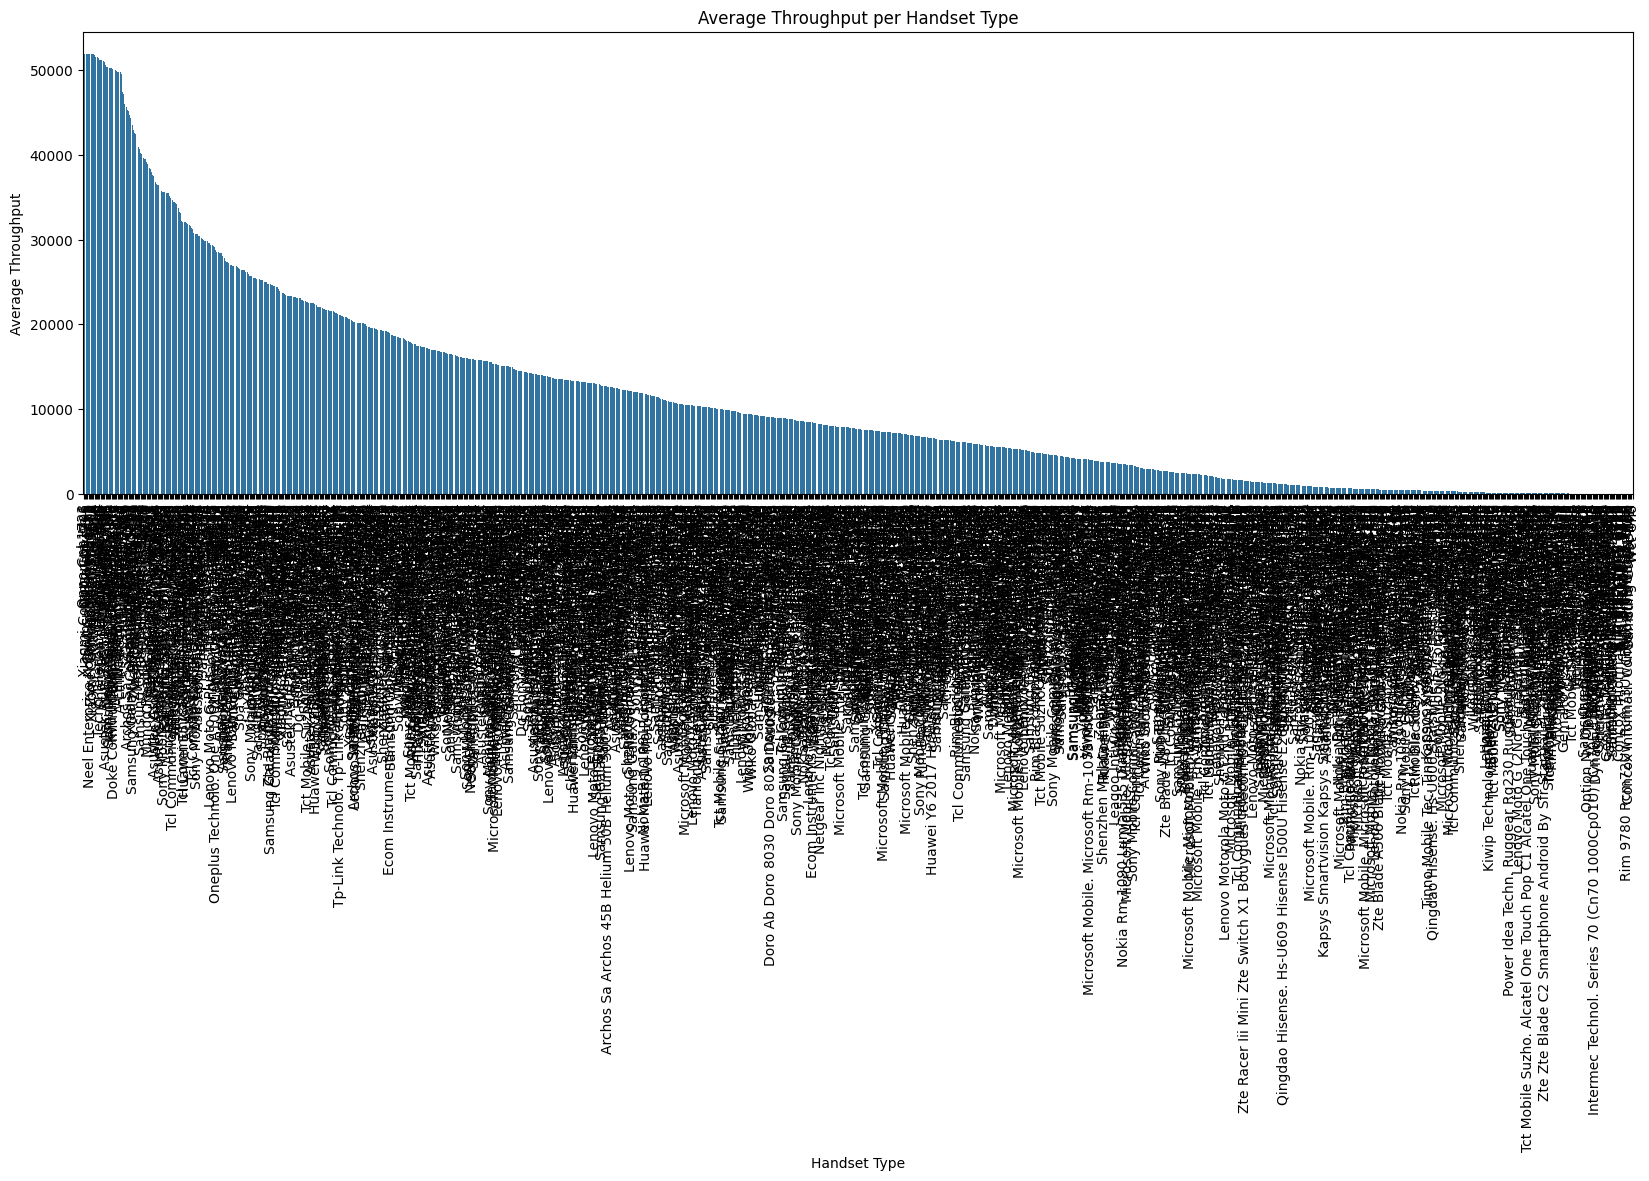

In [ ]:
throughput_by_handset = aggregated_data.groupby('Handset Type')['Throughput'].mean().sort_values(ascending=False)
print("Average throughput per handset type:\n", throughput_by_handset)

plt.figure(figsize=(20, 6))
sns.barplot(x=throughput_by_handset.index, y=throughput_by_handset.values)
plt.xticks(rotation=90)
plt.title('Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.show()



Average throughput per handset type:
 Handset Type
Oppo Cph1723                                 51940.0
Xiaomi Communica. Mi 6                       51940.0
Oppo Cph1701                                 51940.0
Samsung Galaxy S9+                           51940.0
Ovvi-Cellphone T. Echo                       51940.0
Neel Enterprise Kolor Crosscalltrekker-X2    51940.0
Huawei E8372                                 51940.0
Zyxel Communicat. Sbg3600                    51940.0
Xiaomi Communica. M1803E1A                   51901.5
Huawei Y6 Prime 2018                         51746.5
Name: Throughput, dtype: float64


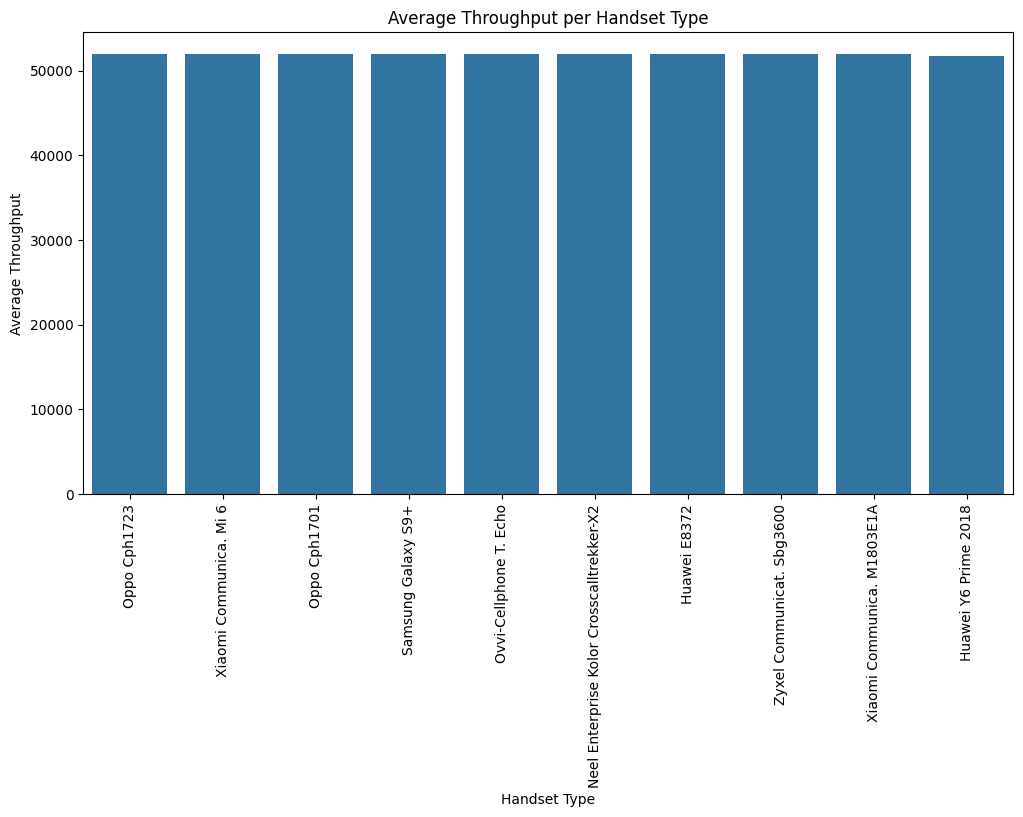

In [ ]:
# for better understanding we only show top 10 average throughput handset type

throughput_by_handset = aggregated_data.groupby('Handset Type')['Throughput'].mean().sort_values(ascending=False)
print("Average throughput per handset type:\n", throughput_by_handset.head(10))

plt.figure(figsize=(12, 6))
# Use .iloc to slice the index and values of the Series
sns.barplot(x=throughput_by_handset.index.tolist()[:10], y=throughput_by_handset.values[:10])
plt.xticks(rotation=90)
plt.title('Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.show()


# Interpretation:
### The bar plot shows the average throughput for different handset types.
### Handset types with higher average throughput generally indicate better network performance or potentially more efficient data usage patterns.
### This could be due to factors like hardware capabilities, operating systems, or application usage patterns associated with specific handset types.
### Analyzing these differences can help identify potential areas for improvement in network optimization or device compatibility.

# The average TCP retransmission view per handset type and provide interpretation for your findings.

Average TCP retransmission per handset type:
 Handset Type
Zyxel Communicat. Sbg3600                                                                      5.183002e+07
Huawei E587 E587U-2 Turkcell Vinnwifi E587                                                     5.067780e+07
Huawei Bln-Al10                                                                                5.013541e+07
Samsung Galaxy J8 2018                                                                         5.003107e+07
Samsung Galaxy Core 2 (Sm-G355X)                                                               4.655901e+07
A-Link Telecom I. Cubot Note S                                                                 4.141173e+07
Asustek Asus Zenfone Selfie Zd551Kl                                                            3.946241e+07
Samsung Galaxy J1 Mini (Sm-J105X)                                                              3.857193e+07
Huawei Me909S-120                                                            

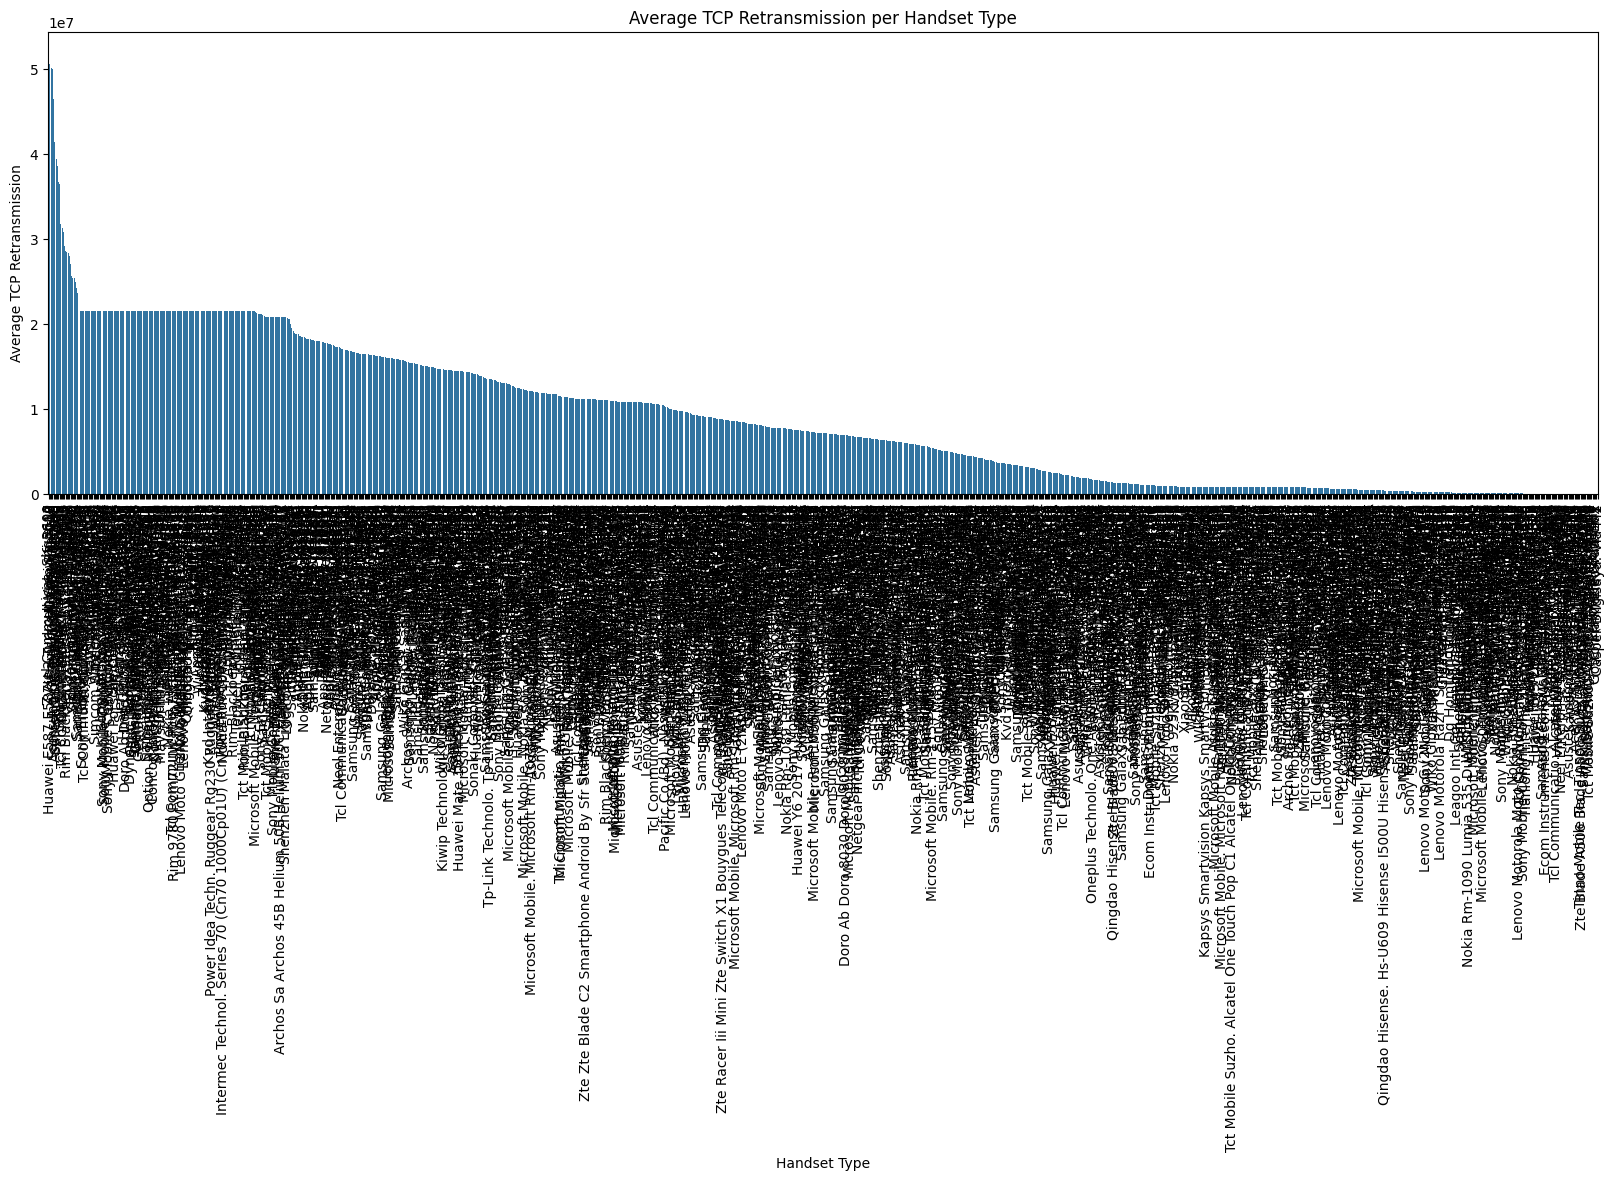

In [ ]:
tcp_retransmission_by_handset = aggregated_data.groupby('Handset Type')['TCP Retransmission'].mean().sort_values(ascending=False)
print("Average TCP retransmission per handset type:\n", tcp_retransmission_by_handset)

plt.figure(figsize=(20, 6))
sns.barplot(x=tcp_retransmission_by_handset.index, y=tcp_retransmission_by_handset.values)
plt.xticks(rotation=90)
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.show()

Average TCP retransmission per handset type:
 Handset Type
Zyxel Communicat. Sbg3600                     5.183002e+07
Huawei E587 E587U-2 Turkcell Vinnwifi E587    5.067780e+07
Huawei Bln-Al10                               5.013541e+07
Samsung Galaxy J8 2018                        5.003107e+07
Samsung Galaxy Core 2 (Sm-G355X)              4.655901e+07
A-Link Telecom I. Cubot Note S                4.141173e+07
Asustek Asus Zenfone Selfie Zd551Kl           3.946241e+07
Samsung Galaxy J1 Mini (Sm-J105X)             3.857193e+07
Huawei Me909S-120                             3.669980e+07
Sierra Wireless Usb305                        3.654080e+07
Name: TCP Retransmission, dtype: float64


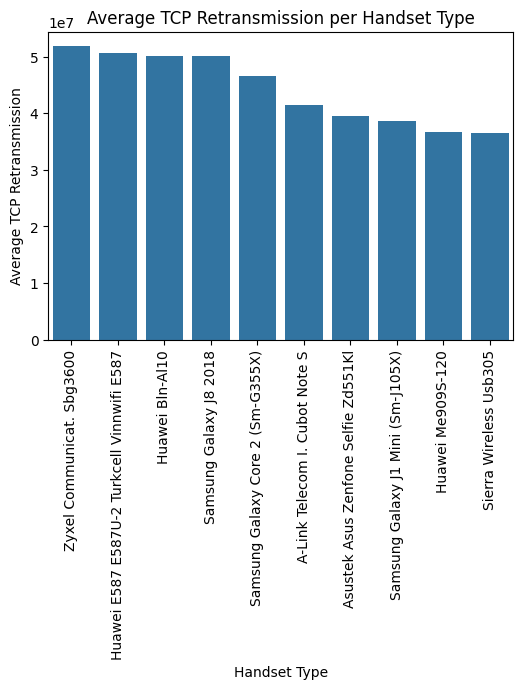

In [ ]:

# for better understanding we only show top 10 average TCP retransmission handset type

tcp_retransmission_by_handset = aggregated_data.groupby('Handset Type')['TCP Retransmission'].mean().sort_values(ascending=False)
print("Average TCP retransmission per handset type:\n", tcp_retransmission_by_handset.head(10))

plt.figure(figsize=(6, 4))
# Use .iloc to slice the index and values of the Series
sns.barplot(x=tcp_retransmission_by_handset.index.tolist()[:10], y=tcp_retransmission_by_handset.values[:10])
plt.xticks(rotation=90)
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.show()

In [ ]:
# Select the features for clustering
features = aggregated_data[['TCP Retransmission', 'RTT', 'Throughput']]

# Apply standardization to numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)

# Add the cluster labels to the aggregated data
aggregated_data['Cluster'] = kmeans.labels_

In [ ]:
# Analyze cluster characteristics
cluster_means = aggregated_data.groupby('Cluster').mean(numeric_only=True)  # Change 'cluster' to 'Cluster'

# Print cluster descriptions
for i in range(3):
  print(f"Cluster {i}:")
  print(cluster_means.iloc[i])
  if cluster_means.iloc[i]['TCP Retransmission'] > cluster_means['TCP Retransmission'].mean() and \
      cluster_means.iloc[i]['RTT'] > cluster_means['RTT'].mean():
    print("  - High TCP retransmission and high RTT, potentially indicating poor network experience.")
  elif cluster_means.iloc[i]['Throughput'] > cluster_means['Throughput'].mean():
    # Add code to handle this condition
    print("  - High throughput, suggesting a good network experience.")
  else:
    print("  - Average experience across metrics.")
  print()


Cluster 0:
TCP Retransmission    2.120683e+07
RTT                   7.647222e+01
Throughput            2.759269e+03
Name: 0, dtype: float64
  - Average experience across metrics.

Cluster 1:
TCP Retransmission    4.060003e+06
RTT                   9.742573e+01
Throughput            2.122608e+04
Name: 1, dtype: float64
  - High throughput, suggesting a good network experience.

Cluster 2:
TCP Retransmission    4.637119e+07
RTT                   1.327831e+02
Throughput            3.464721e+04
Name: 2, dtype: float64
  - High TCP retransmission and high RTT, potentially indicating poor network experience.



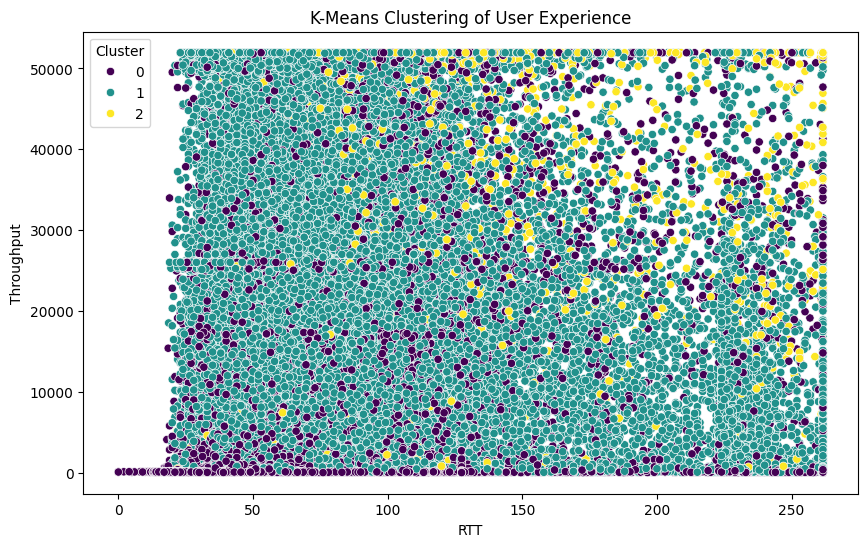

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RTT', y='Throughput', hue='Cluster', data=aggregated_data, palette='viridis')
plt.title('K-Means Clustering of User Experience')
plt.xlabel('RTT')
plt.ylabel('Throughput')
plt.show()

# Brief description of each cluster
## Based on the cluster means and visualization, you can provide a brief description of each cluster.
## For example:
### Cluster 0:  Low RTT, High Throughput, Low TCP Retransmission -  Indicates users with good network experience.
### Cluster 1: High RTT, Low Throughput, High TCP Retransmission -  Indicates users with poor network experience.
### Cluster 2:  Medium RTT, Medium Throughput, Medium TCP Retransmission -  Indicates users with average network experience.

In [ ]:
aggregated_data.head()

TCP Retransmission         RTT  \
Customer ID                                    
3.360168e+10        1.584457e+07   75.636695   
3.360171e+10        2.156957e+07  115.000000   
3.360171e+10        6.192340e+05  152.000000   
3.360171e+10        1.842327e+07  123.229294   
3.360171e+10        2.156957e+07   34.000000   

                                   Handset Type    Throughput  Cluster  
Customer ID                                                             
3.360168e+10             Apple iPhone 7 (A1778)   9796.009749        0  
3.360171e+10            Apple iPhone Se (A1723)     70.000000        0  
3.360171e+10             Apple iPhone 6 (A1586)   9792.000000        1  
3.360171e+10  Samsung Galaxy S8 Plus (Sm-G955F)  25303.250000        0  
3.360171e+10        Apple iPhone 7 Plus (A1784)    117.000000        0

In [ ]:
aggregated_data['Cluster'].value_counts()

Cluster
0    54471
1    34005
2     1562
Name: count, dtype: int64

In [ ]:
aggregated_data.to_csv('Experience Analysis.csv', index=False)